In [5]:
import networkx as nx
from node2vec import Node2Vec
from tqdm import tqdm_notebook
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import community as cm

In [6]:
# graphs = []

# for i in range(25):
# #     network = nx.read_graphml("runs/graphs/m" + str(start + i) + ".graphml")
#     network = nx.read_graphml("hepth/graphs/" + str(i) + ".graphml")
#     graphs.append(network)

# graphs = [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)]
# graphs = [nx.read_graphml('hepth/irvine/' + str(i)  + '.graphml') for i in range(10)]
graphs = [nx.read_graphml('hepth/cora.graphml')]
# graphs = [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)]
# graphs = [nx.read_graphml('hepth/AS_test/' + str(i) + '.graphml') for i in range(10)]

In [9]:
all_embeds = []

for g in tqdm_notebook(graphs):
    node2vec = Node2Vec(g, dimensions=16, workers=9)
        
    model = node2vec.fit()
    embed = []
    for node in g.nodes:
        embed.append(model[node])
    all_embeds.append(np.array(embed))
    

Computing transition probabilities: 100%|████████████████████████████████████████| 2485/2485 [00:00<00:00, 5541.73it/s]
C:\Users\jxbox\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [10]:
pickle.dump(all_embeds, open('hepth/w2v_cora.pkl', 'wb'))

In [6]:
layout = nx.kamada_kawai_layout(graphs[-1])

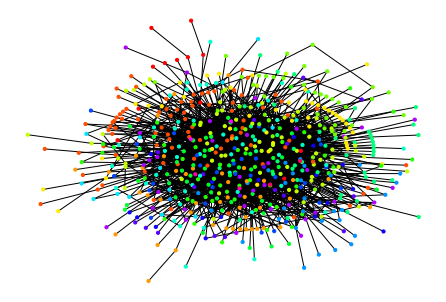

best communities
0.336379893558402
num clusters 20


0.3244251987670426
0.288271909993497
0.31451256605526057
0.30951983168458014
0.2974642277523588
0.31768782323662775
0.31636076960722814
0.28987729825061725
0.3241390755627161
0.30905123325691397
0.29254218969240947
0.31770331480108577
0.31568718611394364
0.292961831352838
0.31599017030279075



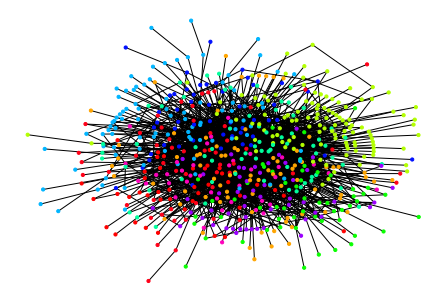

k means communities
0.3084129750953274 0.3244251987670426


In [7]:
%matplotlib inline
%matplotlib inline

network = graphs[-1]

communities = cm.best_partition(network)
best_vec = [communities.get(node) for node in network.nodes()]
mod = cm.modularity(communities,network)
community_vec = np.zeros(network.number_of_nodes())
# for idx, c in enumerate(communities):
#     c = [int(x) for x in c]
#     community_vec[c] = idx
    
nx.draw(network, pos=layout, node_size=10, node_color=best_vec, cmap='hsv')
# plt.savefig('communities.png')
num_coms = len(set(communities.values()))
plt.show()
print("best communities")
print(mod)

print("num clusters", num_coms)

mods = []

for _ in tqdm_notebook(range(5)):
    
    embeddings = all_embeds[-1]
    
    clusters = cluster.KMeans(11).fit_predict(embeddings)
    cluster_dict = dict([(list(network.nodes)[i], clusters[i]) for i in range(len(clusters))])
    mods.append(cm.modularity(cluster_dict,network))
        
    print(mods[-1])
    
    clusters = cluster.KMeans(int(num_coms)).fit_predict(embeddings)
    cluster_dict = dict([(list(network.nodes)[i], clusters[i]) for i in range(len(clusters))])
    mods.append(cm.modularity(cluster_dict,network))
        
    print(mods[-1])
    
    clusters = cluster.KMeans(int(num_coms/2)).fit_predict(embeddings)
    cluster_dict = dict([(list(network.nodes)[i], clusters[i]) for i in range(len(clusters))])
    mods.append(cm.modularity(cluster_dict,network))
        
    print(mods[-1])
    
# clusters = cluster.AgglomerativeClustering(num_coms, connectivity=nx.to_numpy_matrix(network)).fit_predict(embeddings)
# mods.append(cm.modularity(cluster_dict,network))
nx.draw(network, pos=layout, node_size=10, node_color=clusters, cmap='hsv')
plt.show()
print("k means communities")
print(sum(mods) / len(mods), max(mods))
# # plt.savefig('kmeans.png')